In [24]:
import cv2

categories=['Cat','Dog']
img_size=50

data_set=[]

for i in range(12500):
    
    try:
    
        for category in categories:

            img=cv2.imread('PetImages/'+category+'/'+str(i)+'.jpg')
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized_img=cv2.resize(gray,(img_size,img_size))
            #cv2.imshow('SAMPLE',resized_img)
            #cv2.waitKey(500)
            if(category=='Cat'):
                data_set.append([resized_img,0])
            else:
                data_set.append([resized_img,1])
    
    except Exception as e:
        
        print('i=',i,category)
        pass
print('DONE! train data size:',len(data_set))


i= 140 Cat
i= 660 Cat
i= 666 Cat
i= 850 Cat
i= 936 Cat
i= 1308 Dog
i= 1866 Dog
i= 2384 Dog
i= 2663 Cat
i= 2688 Dog
i= 2877 Dog
i= 3136 Dog
i= 3288 Dog
i= 3300 Cat
i= 3491 Cat
i= 3588 Dog
i= 4367 Dog
i= 4833 Cat
i= 5553 Cat
i= 5604 Dog
i= 5736 Dog
i= 6059 Dog
i= 6238 Dog
i= 6718 Dog
i= 7112 Dog
i= 7133 Dog
i= 7369 Dog
i= 7459 Dog
i= 7968 Cat
i= 7969 Dog
i= 7978 Cat
i= 8470 Cat
i= 8730 Dog
i= 9171 Cat
i= 9188 Dog
i= 9565 Cat
i= 9778 Cat
i= 10125 Cat
i= 10158 Dog
i= 10401 Dog
i= 10404 Cat
i= 10501 Cat
i= 10747 Dog
i= 10797 Dog
i= 10820 Cat
i= 11210 Cat
i= 11410 Dog
i= 11565 Cat
i= 11675 Dog
i= 11702 Dog
i= 11849 Dog
i= 11853 Dog
i= 11874 Cat
i= 11935 Cat
DONE! train data size: 24922


In [25]:
train_data=[]
train_target=[]

for features,label in data_set:
    
    train_data.append(features)
    train_target.append(label)

import numpy as np

train_data=np.array(train_data).reshape(-1,img_size,img_size,1)

print('DONE! Data set created')

DONE! Data set created


In [26]:
import pickle #using pickle youcan write arrays at once to .pickle file

train_data_file=open('train_data.pickle','wb') #wb-write in bytes
pickle.dump(train_data,train_data_file)

In [27]:
train_target_file=open('train_target.pickle','wb')
pickle.dump(train_target,train_target_file)

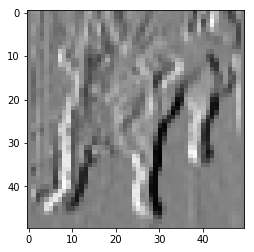

In [10]:
import cv2
from matplotlib import pyplot as plt

img=data_set[3][0]

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
plt.imshow(sobelx,cmap=plt.cm.binary)
plt.show()

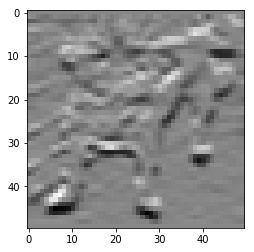

In [12]:
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
plt.imshow(sobely,cmap=plt.cm.binary)
plt.show()

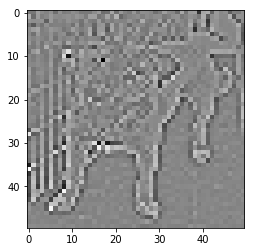

In [14]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
plt.imshow(laplacian,cmap=plt.cm.binary)
plt.show()

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [28]:
train_data=train_data/255.0 #scale down 0-255 to 0-1

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=train_data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_data, train_target, batch_size=32, epochs=3, validation_split=0.3)

Train on 17445 samples, validate on 7477 samples
Epoch 1/3
  544/17445 [..............................] - ETA: 19:02 - loss: 0.7924 - acc: 0.5018

KeyboardInterrupt: 